[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/02_0_Compare_Loss_Function_FashionMnist.ipynb)

# 02 Comparison of Different Loss Function Using FashionMNIST


## 1. Introduction to the Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes

Labels:


*   0 : T-shirt/top
*   1 : Trouser
*   2 : Pullover
*   3 : Dress
*   4 : Coat
*   5 : Sandal
*   6 : Shirt
*   7 : Sneake
*   8 : Bag
*   9 : Ankle Boot











## 2. Data Preprocessing

In [1]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
num_classes = 10
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
Y_train = to_categorical(Y_train,num_classes)
Y_test = to_categorical(Y_test, num_classes)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

## 3. Building the Neural Network

In [0]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import losses
from keras.layers.normalization import BatchNormalization

In [0]:
batch_size = 256
epochs = 100
input_shape = (img_rows, img_cols, 1)

In [0]:
def model(loss):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3,3), activation='relu',
                   kernel_initializer='he_normal',input_shape=input_shape))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128,(3,3), activation='relu'))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(num_classes,activation='softmax'))
  
  model.compile(loss=loss,
               optimizer='adam',metrics=['accuracy'])
  
  return model

### 3.1 Loss = Mean Squared Error





In [0]:
loss_1 =losses.mean_squared_error

In [9]:
start = time.time()
model_1 = model(loss_1)
model_1_history = model_1.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 7s - loss: 0.0401 - acc: 0.6941 - val_loss: 0.0263 - val_acc: 0.8142
Epoch 2/100
 - 5s - loss: 0.0260 - acc: 0.8166 - val_loss: 0.0222 - val_acc: 0.8401
Epoch 3/100
 - 4s - loss: 0.0221 - acc: 0.8456 - val_loss: 0.0191 - val_acc: 0.8662
Epoch 4/100
 - 4s - loss: 0.0203 - acc: 0.8594 - val_loss: 0.0189 - val_acc: 0.8667
Epoch 5/100
 - 5s - loss: 0.0187 - acc: 0.8697 - val_loss: 0.0160 - val_acc: 0.8902
Epoch 6/100
 - 4s - loss: 0.0174 - acc: 0.8802 - val_loss: 0.0154 - val_acc: 0.8951
Epoch 7/100
 - 5s - loss: 0.0169 - acc: 0.8845 - val_loss: 0.0153 - val_acc: 0.8926
Epoch 8/100
 - 4s - loss: 0.0162 - acc: 0.8888 - val_loss: 0.0144 - val_acc: 0.8999
Epoch 9/100
 - 4s - loss: 0.0158 - acc: 0.8917 - val_loss: 0.0147 - val_acc: 0.8985
Epoch 10/100
 - 4s - loss: 0.0153 - acc: 0.8950 - val_loss: 0.0142 - val_acc: 0.9004
Epoch 11/100
 - 4s - loss: 0.0148 - acc: 0.8982 - val_loss: 0.0137 - val_acc: 0.9052
Epoch 12/100
 - 4s - los

 - 5s - loss: 0.0114 - acc: 0.9228 - val_loss: 0.0119 - val_acc: 0.9180
Epoch 35/100
 - 5s - loss: 0.0114 - acc: 0.9237 - val_loss: 0.0123 - val_acc: 0.9156
Epoch 36/100
 - 4s - loss: 0.0113 - acc: 0.9232 - val_loss: 0.0120 - val_acc: 0.9176
Epoch 37/100
 - 4s - loss: 0.0113 - acc: 0.9231 - val_loss: 0.0122 - val_acc: 0.9158
Epoch 38/100
 - 5s - loss: 0.0112 - acc: 0.9243 - val_loss: 0.0117 - val_acc: 0.9193
Epoch 39/100
 - 4s - loss: 0.0113 - acc: 0.9245 - val_loss: 0.0119 - val_acc: 0.9187
Epoch 40/100
 - 5s - loss: 0.0112 - acc: 0.9243 - val_loss: 0.0118 - val_acc: 0.9176
Epoch 41/100
 - 4s - loss: 0.0111 - acc: 0.9258 - val_loss: 0.0117 - val_acc: 0.9186
Epoch 42/100
 - 5s - loss: 0.0111 - acc: 0.9259 - val_loss: 0.0119 - val_acc: 0.9187
Epoch 43/100
 - 5s - loss: 0.0109 - acc: 0.9268 - val_loss: 0.0116 - val_acc: 0.9214
Epoch 44/100
 - 4s - loss: 0.0108 - acc: 0.9269 - val_loss: 0.0122 - val_acc: 0.9160
Epoch 45/100
 - 5s - loss: 0.0109 - acc: 0.9279 - val_loss: 0.0120 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.0099 - acc: 0.9336 - val_loss: 0.0115 - val_acc: 0.9212
Epoch 69/100
 - 4s - loss: 0.0100 - acc: 0.9335 - val_loss: 0.0115 - val_acc: 0.9207
Epoch 70/100
 - 5s - loss: 0.0097 - acc: 0.9354 - val_loss: 0.0119 - val_acc: 0.9178
Epoch 71/100
 - 4s - loss: 0.0098 - acc: 0.9343 - val_loss: 0.0122 - val_acc: 0.9152
Epoch 72/100
 - 5s - loss: 0.0099 - acc: 0.9342 - val_loss: 0.0113 - val_acc: 0.9231
Epoch 73/100
 - 4s - loss: 0.0098 - acc: 0.9336 - val_loss: 0.0115 - val_acc: 0.9214
Epoch 74/100
 - 5s - loss: 0.0097 - acc: 0.9353 - val_loss: 0.0111 - val_acc: 0.9249
Epoch 75/100
 - 5s - loss: 0.0097 - acc: 0.9355 - val_loss: 0.0117 - val_acc: 0.9207
Epoch 76/100
 - 5s - loss: 0.0097 - acc: 0.9350 - val_loss: 0.0115 - val_acc: 0.9228
Epoch 77/100
 - 4s - loss: 0.0098 - acc: 0.9350 - val_loss: 0.0114 - val_acc: 0.9223
Epoch 78/100
 - 4s - loss: 0.0098 - acc: 0.9336 - val_loss: 0.0114 - val_acc: 0.9228
Epoch 79/100
 - 5s - loss: 0.0097 - acc: 0.9359 - val_loss: 0.011

In [10]:
train_loss_1, train_accuracy_1 = model_1.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_1 * 100, train_loss_1))
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_1 * 100, test_loss_1))

Training Accuracy = 96.93 %     loss = 0.004975
Testing Accuracy = 92.35 %    loss = 0.011499


### 3.2 Loss = mean_absolute_error

In [0]:
loss_2 =losses.mean_absolute_error

In [12]:
start = time.time()
model_2 = model(loss_2)
model_2_history = model_2.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.0756 - acc: 0.6292 - val_loss: 0.0521 - val_acc: 0.7428
Epoch 2/100
 - 5s - loss: 0.0511 - acc: 0.7480 - val_loss: 0.0475 - val_acc: 0.7660
Epoch 3/100
 - 4s - loss: 0.0478 - acc: 0.7637 - val_loss: 0.0447 - val_acc: 0.7785
Epoch 4/100
 - 5s - loss: 0.0434 - acc: 0.7855 - val_loss: 0.0343 - val_acc: 0.8325
Epoch 5/100
 - 5s - loss: 0.0348 - acc: 0.8289 - val_loss: 0.0311 - val_acc: 0.8467
Epoch 6/100
 - 5s - loss: 0.0318 - acc: 0.8430 - val_loss: 0.0295 - val_acc: 0.8538
Epoch 7/100
 - 5s - loss: 0.0300 - acc: 0.8517 - val_loss: 0.0268 - val_acc: 0.8674
Epoch 8/100
 - 5s - loss: 0.0286 - acc: 0.8580 - val_loss: 0.0265 - val_acc: 0.8684
Epoch 9/100
 - 4s - loss: 0.0274 - acc: 0.8648 - val_loss: 0.0267 - val_acc: 0.8687
Epoch 10/100
 - 5s - loss: 0.0269 - acc: 0.8669 - val_loss: 0.0234 - val_acc: 0.8858
Epoch 11/100
 - 5s - loss: 0.0257 - acc: 0.8729 - val_loss: 0.0231 - val_acc: 0.8863
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.0205 - acc: 0.8979 - val_loss: 0.0201 - val_acc: 0.9001
Epoch 35/100
 - 4s - loss: 0.0210 - acc: 0.8950 - val_loss: 0.0200 - val_acc: 0.9005
Epoch 36/100
 - 5s - loss: 0.0206 - acc: 0.8976 - val_loss: 0.0207 - val_acc: 0.8967
Epoch 37/100
 - 5s - loss: 0.0203 - acc: 0.8988 - val_loss: 0.0195 - val_acc: 0.9030
Epoch 38/100
 - 5s - loss: 0.0203 - acc: 0.8992 - val_loss: 0.0198 - val_acc: 0.9014
Epoch 39/100
 - 5s - loss: 0.0204 - acc: 0.8987 - val_loss: 0.0195 - val_acc: 0.9029
Epoch 40/100
 - 5s - loss: 0.0206 - acc: 0.8977 - val_loss: 0.0204 - val_acc: 0.8978
Epoch 41/100
 - 5s - loss: 0.0202 - acc: 0.8999 - val_loss: 0.0199 - val_acc: 0.9014
Epoch 42/100
 - 5s - loss: 0.0202 - acc: 0.8996 - val_loss: 0.0205 - val_acc: 0.8974
Epoch 43/100
 - 5s - loss: 0.0201 - acc: 0.8998 - val_loss: 0.0195 - val_acc: 0.9022
Epoch 44/100
 - 5s - loss: 0.0201 - acc: 0.8995 - val_loss: 0.0194 - val_acc: 0.9039
Epoch 45/100
 - 4s - loss: 0.0203 - acc: 0.8984 - val_loss: 0.0210 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.0195 - acc: 0.9025 - val_loss: 0.0198 - val_acc: 0.9014
Epoch 69/100
 - 5s - loss: 0.0192 - acc: 0.9042 - val_loss: 0.0200 - val_acc: 0.8999
Epoch 70/100
 - 5s - loss: 0.0194 - acc: 0.9031 - val_loss: 0.0193 - val_acc: 0.9042
Epoch 71/100
 - 5s - loss: 0.0198 - acc: 0.9012 - val_loss: 0.0193 - val_acc: 0.9038
Epoch 72/100
 - 4s - loss: 0.0194 - acc: 0.9034 - val_loss: 0.0199 - val_acc: 0.9010
Epoch 73/100
 - 5s - loss: 0.0197 - acc: 0.9015 - val_loss: 0.0185 - val_acc: 0.9070
Epoch 74/100
 - 5s - loss: 0.0194 - acc: 0.9030 - val_loss: 0.0190 - val_acc: 0.9056
Epoch 75/100
 - 4s - loss: 0.0195 - acc: 0.9029 - val_loss: 0.0190 - val_acc: 0.9052
Epoch 76/100
 - 4s - loss: 0.0197 - acc: 0.9017 - val_loss: 0.0192 - val_acc: 0.9038
Epoch 77/100
 - 4s - loss: 0.0202 - acc: 0.8990 - val_loss: 0.0187 - val_acc: 0.9064
Epoch 78/100
 - 4s - loss: 0.0198 - acc: 0.9014 - val_loss: 0.0194 - val_acc: 0.9032
Epoch 79/100
 - 4s - loss: 0.0197 - acc: 0.9018 - val_loss: 0.018

In [13]:
train_loss_2, train_accuracy_2 = model_2.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_2 * 100, train_loss_2))
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_2 * 100, test_loss_2))

Training Accuracy = 92.66 %     loss = 0.014684
Testing Accuracy = 90.28 %    loss = 0.019446


### 3.3 Loss = mean_absolute_percentage_error

In [0]:
loss_3 =losses.mean_absolute_percentage_error

In [15]:
start = time.time()
model_3 = model(loss_3)
model_3_history = model_3.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 40141057.7504 - acc: 0.6053 - val_loss: 28849436.2592 - val_acc: 0.7142
Epoch 2/100
 - 4s - loss: 28269851.9381 - acc: 0.7200 - val_loss: 26339028.1184 - val_acc: 0.7378
Epoch 3/100
 - 5s - loss: 26978240.4192 - acc: 0.7323 - val_loss: 25592658.1456 - val_acc: 0.7450
Epoch 4/100
 - 5s - loss: 26055729.3483 - acc: 0.7406 - val_loss: 25169226.0080 - val_acc: 0.7491
Epoch 5/100
 - 4s - loss: 25760725.0528 - acc: 0.7438 - val_loss: 24881597.2928 - val_acc: 0.7520
Epoch 6/100
 - 4s - loss: 25368355.8837 - acc: 0.7475 - val_loss: 24745677.9104 - val_acc: 0.7527
Epoch 7/100
 - 5s - loss: 25172273.0229 - acc: 0.7494 - val_loss: 24432074.9216 - val_acc: 0.7565
Epoch 8/100
 - 4s - loss: 24970035.1392 - acc: 0.7514 - val_loss: 24570011.6992 - val_acc: 0.7550
Epoch 9/100
 - 5s - loss: 24644895.7664 - acc: 0.7544 - val_loss: 23896391.6608 - val_acc: 0.7619
Epoch 10/100
 - 5s - loss: 24574149.9221 - acc: 0.7553 - val_loss: 2

Epoch 32/100
 - 5s - loss: 11371676.6976 - acc: 0.8868 - val_loss: 10635137.6704 - val_acc: 0.8941
Epoch 33/100
 - 4s - loss: 11140623.5648 - acc: 0.8891 - val_loss: 10818539.2904 - val_acc: 0.8925
Epoch 34/100
 - 5s - loss: 11013436.1691 - acc: 0.8906 - val_loss: 10612961.3248 - val_acc: 0.8938
Epoch 35/100
 - 5s - loss: 11043489.4499 - acc: 0.8900 - val_loss: 10724934.6320 - val_acc: 0.8923
Epoch 36/100
 - 5s - loss: 10871082.2683 - acc: 0.8917 - val_loss: 10531939.6192 - val_acc: 0.8950
Epoch 37/100
 - 5s - loss: 10983042.3611 - acc: 0.8908 - val_loss: 10848014.4288 - val_acc: 0.8912
Epoch 38/100
 - 5s - loss: 10965344.3963 - acc: 0.8909 - val_loss: 10260237.3432 - val_acc: 0.8980
Epoch 39/100
 - 4s - loss: 10787868.3717 - acc: 0.8924 - val_loss: 10536623.2448 - val_acc: 0.8952
Epoch 40/100
 - 5s - loss: 10727040.8997 - acc: 0.8930 - val_loss: 10973977.2224 - val_acc: 0.8907
Epoch 41/100
 - 5s - loss: 10811223.4016 - acc: 0.8921 - val_loss: 10007395.7920 - val_acc: 0.8999
Epoch 42/1

 - 4s - loss: 9869063.6144 - acc: 0.9016 - val_loss: 10259695.6240 - val_acc: 0.8977
Epoch 64/100
 - 5s - loss: 9913141.2800 - acc: 0.9013 - val_loss: 9698964.6112 - val_acc: 0.9035
Epoch 65/100
 - 4s - loss: 9898992.6005 - acc: 0.9013 - val_loss: 9580763.4496 - val_acc: 0.9042
Epoch 66/100
 - 4s - loss: 10014062.7648 - acc: 0.9000 - val_loss: 10220362.7776 - val_acc: 0.8983
Epoch 67/100
 - 5s - loss: 10011712.6776 - acc: 0.9001 - val_loss: 9725575.2064 - val_acc: 0.9029
Epoch 68/100
 - 5s - loss: 9994502.6984 - acc: 0.9001 - val_loss: 9434184.6784 - val_acc: 0.9058
Epoch 69/100
 - 5s - loss: 9909637.5717 - acc: 0.9012 - val_loss: 9641980.2544 - val_acc: 0.9038
Epoch 70/100
 - 4s - loss: 9974068.0288 - acc: 0.9004 - val_loss: 9952262.2912 - val_acc: 0.9007
Epoch 71/100
 - 5s - loss: 9683130.1381 - acc: 0.9033 - val_loss: 10001721.3472 - val_acc: 0.8995
Epoch 72/100
 - 5s - loss: 9966982.6069 - acc: 0.9004 - val_loss: 10382274.6400 - val_acc: 0.8968
Epoch 73/100
 - 4s - loss: 9876828.15

Epoch 95/100
 - 5s - loss: 9487553.5355 - acc: 0.9052 - val_loss: 9939775.5008 - val_acc: 0.9006
Epoch 96/100
 - 5s - loss: 9757034.6941 - acc: 0.9025 - val_loss: 9948306.9816 - val_acc: 0.9006
Epoch 97/100
 - 4s - loss: 9732095.6976 - acc: 0.9027 - val_loss: 10041057.6152 - val_acc: 0.8995
Epoch 98/100
 - 5s - loss: 9856217.9552 - acc: 0.9016 - val_loss: 9364000.2072 - val_acc: 0.9063
Epoch 99/100
 - 5s - loss: 9470640.8424 - acc: 0.9053 - val_loss: 9442896.3824 - val_acc: 0.9057
Epoch 100/100
 - 5s - loss: 9737815.4472 - acc: 0.9027 - val_loss: 9723064.4144 - val_acc: 0.9024
@ Total Time Spent: 452.22 seconds


In [16]:
train_loss_3, train_accuracy_3 = model_3.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_3 * 100, train_loss_3))
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_3 * 100, test_loss_3))

Training Accuracy = 92.36 %     loss = 7651036.570186
Testing Accuracy = 90.24 %    loss = 9723063.775543


### 3.4 loss = mean_squared_logarithmic_error


In [0]:
loss_4 =losses.mean_squared_logarithmic_error

In [19]:
train_loss_4, train_accuracy_4 = model_4.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_4 * 100, train_loss_4))
test_loss_4, test_accuracy_4 = model_4.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_4 * 100, test_loss_4))

Training Accuracy = 97.29 %     loss = 0.002180
Testing Accuracy = 92.75 %    loss = 0.005219


### 3.5 loss = squared_hinge



In [0]:
loss_5 = losses.squared_hinge

In [21]:
start = time.time()
model_5 = model(loss_5)
model_5_history = model_5.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.9272 - acc: 0.6873 - val_loss: 0.9169 - val_acc: 0.8039
Epoch 2/100
 - 5s - loss: 0.9166 - acc: 0.8035 - val_loss: 0.9139 - val_acc: 0.8349
Epoch 3/100
 - 5s - loss: 0.9140 - acc: 0.8319 - val_loss: 0.9114 - val_acc: 0.8610
Epoch 4/100
 - 5s - loss: 0.9123 - acc: 0.8511 - val_loss: 0.9104 - val_acc: 0.8741
Epoch 5/100
 - 5s - loss: 0.9114 - acc: 0.8618 - val_loss: 0.9100 - val_acc: 0.8791
Epoch 6/100
 - 5s - loss: 0.9107 - acc: 0.8703 - val_loss: 0.9092 - val_acc: 0.8871
Epoch 7/100
 - 5s - loss: 0.9101 - acc: 0.8767 - val_loss: 0.9089 - val_acc: 0.8906
Epoch 8/100
 - 5s - loss: 0.9096 - acc: 0.8821 - val_loss: 0.9087 - val_acc: 0.8934
Epoch 9/100
 - 5s - loss: 0.9094 - acc: 0.8854 - val_loss: 0.9084 - val_acc: 0.8973
Epoch 10/100
 - 5s - loss: 0.9091 - acc: 0.8882 - val_loss: 0.9085 - val_acc: 0.8934
Epoch 11/100
 - 5s - loss: 0.9088 - acc: 0.8921 - val_loss: 0.9079 - val_acc: 0.9015
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.9065 - acc: 0.9196 - val_loss: 0.9067 - val_acc: 0.9161
Epoch 35/100
 - 5s - loss: 0.9064 - acc: 0.9202 - val_loss: 0.9068 - val_acc: 0.9137
Epoch 36/100
 - 5s - loss: 0.9064 - acc: 0.9207 - val_loss: 0.9066 - val_acc: 0.9158
Epoch 37/100
 - 5s - loss: 0.9065 - acc: 0.9193 - val_loss: 0.9066 - val_acc: 0.9170
Epoch 38/100
 - 5s - loss: 0.9063 - acc: 0.9212 - val_loss: 0.9066 - val_acc: 0.9167
Epoch 39/100
 - 5s - loss: 0.9063 - acc: 0.9216 - val_loss: 0.9065 - val_acc: 0.9188
Epoch 40/100
 - 5s - loss: 0.9064 - acc: 0.9219 - val_loss: 0.9066 - val_acc: 0.9168
Epoch 41/100
 - 5s - loss: 0.9062 - acc: 0.9224 - val_loss: 0.9064 - val_acc: 0.9203
Epoch 42/100
 - 5s - loss: 0.9062 - acc: 0.9241 - val_loss: 0.9067 - val_acc: 0.9149
Epoch 43/100
 - 5s - loss: 0.9061 - acc: 0.9249 - val_loss: 0.9065 - val_acc: 0.9190
Epoch 44/100
 - 4s - loss: 0.9062 - acc: 0.9227 - val_loss: 0.9063 - val_acc: 0.9208
Epoch 45/100
 - 5s - loss: 0.9062 - acc: 0.9229 - val_loss: 0.9064 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.9055 - acc: 0.9322 - val_loss: 0.9062 - val_acc: 0.9210
Epoch 69/100
 - 5s - loss: 0.9056 - acc: 0.9308 - val_loss: 0.9062 - val_acc: 0.9228
Epoch 70/100
 - 4s - loss: 0.9055 - acc: 0.9319 - val_loss: 0.9064 - val_acc: 0.9204
Epoch 71/100
 - 4s - loss: 0.9055 - acc: 0.9324 - val_loss: 0.9063 - val_acc: 0.9223
Epoch 72/100
 - 4s - loss: 0.9055 - acc: 0.9314 - val_loss: 0.9064 - val_acc: 0.9206
Epoch 73/100
 - 4s - loss: 0.9054 - acc: 0.9327 - val_loss: 0.9065 - val_acc: 0.9189
Epoch 74/100
 - 4s - loss: 0.9054 - acc: 0.9336 - val_loss: 0.9062 - val_acc: 0.9243
Epoch 75/100
 - 5s - loss: 0.9055 - acc: 0.9319 - val_loss: 0.9064 - val_acc: 0.9189
Epoch 76/100
 - 5s - loss: 0.9054 - acc: 0.9329 - val_loss: 0.9062 - val_acc: 0.9231
Epoch 77/100
 - 5s - loss: 0.9054 - acc: 0.9329 - val_loss: 0.9062 - val_acc: 0.9223
Epoch 78/100
 - 5s - loss: 0.9053 - acc: 0.9338 - val_loss: 0.9062 - val_acc: 0.9234
Epoch 79/100
 - 5s - loss: 0.9055 - acc: 0.9322 - val_loss: 0.906

In [22]:
train_loss_5, train_accuracy_5 = model_5.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_5 * 100, train_loss_5))
test_loss_5, test_accuracy_5 = model_5.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_5 * 100, test_loss_5))

Training Accuracy = 96.77 %     loss = 0.902789
Testing Accuracy = 92.23 %    loss = 0.906260


### 3.6 loss = hinge

In [0]:
loss_6 = losses.hinge

In [24]:
start = time.time()
model_6 = model(loss_6)
model_6_history = model_6.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.9412 - acc: 0.5946 - val_loss: 0.9299 - val_acc: 0.7038
Epoch 2/100
 - 5s - loss: 0.9265 - acc: 0.7388 - val_loss: 0.9209 - val_acc: 0.7926
Epoch 3/100
 - 5s - loss: 0.9212 - acc: 0.7903 - val_loss: 0.9195 - val_acc: 0.8061
Epoch 4/100
 - 5s - loss: 0.9199 - acc: 0.8028 - val_loss: 0.9187 - val_acc: 0.8143
Epoch 5/100
 - 5s - loss: 0.9192 - acc: 0.8096 - val_loss: 0.9180 - val_acc: 0.8215
Epoch 6/100
 - 5s - loss: 0.9187 - acc: 0.8144 - val_loss: 0.9176 - val_acc: 0.8251
Epoch 7/100
 - 5s - loss: 0.9170 - acc: 0.8317 - val_loss: 0.9149 - val_acc: 0.8529
Epoch 8/100
 - 5s - loss: 0.9155 - acc: 0.8472 - val_loss: 0.9137 - val_acc: 0.8650
Epoch 9/100
 - 5s - loss: 0.9146 - acc: 0.8555 - val_loss: 0.9131 - val_acc: 0.8701
Epoch 10/100
 - 5s - loss: 0.9141 - acc: 0.8613 - val_loss: 0.9127 - val_acc: 0.8742
Epoch 11/100
 - 5s - loss: 0.9135 - acc: 0.8661 - val_loss: 0.9124 - val_acc: 0.8774
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.9105 - acc: 0.8954 - val_loss: 0.9103 - val_acc: 0.8976
Epoch 35/100
 - 5s - loss: 0.9105 - acc: 0.8951 - val_loss: 0.9100 - val_acc: 0.9003
Epoch 36/100
 - 5s - loss: 0.9104 - acc: 0.8966 - val_loss: 0.9101 - val_acc: 0.8996
Epoch 37/100
 - 5s - loss: 0.9104 - acc: 0.8963 - val_loss: 0.9096 - val_acc: 0.9043
Epoch 38/100
 - 5s - loss: 0.9105 - acc: 0.8953 - val_loss: 0.9102 - val_acc: 0.8986
Epoch 39/100
 - 4s - loss: 0.9103 - acc: 0.8972 - val_loss: 0.9101 - val_acc: 0.8992
Epoch 40/100
 - 5s - loss: 0.9105 - acc: 0.8953 - val_loss: 0.9100 - val_acc: 0.9001
Epoch 41/100
 - 5s - loss: 0.9101 - acc: 0.8993 - val_loss: 0.9098 - val_acc: 0.9019
Epoch 42/100
 - 5s - loss: 0.9103 - acc: 0.8974 - val_loss: 0.9095 - val_acc: 0.9052
Epoch 43/100
 - 5s - loss: 0.9102 - acc: 0.8982 - val_loss: 0.9099 - val_acc: 0.9009
Epoch 44/100
 - 5s - loss: 0.9101 - acc: 0.8988 - val_loss: 0.9101 - val_acc: 0.8990
Epoch 45/100
 - 5s - loss: 0.9099 - acc: 0.9018 - val_loss: 0.9095 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.9100 - acc: 0.9001 - val_loss: 0.9096 - val_acc: 0.9046
Epoch 69/100
 - 5s - loss: 0.9099 - acc: 0.9018 - val_loss: 0.9104 - val_acc: 0.8967
Epoch 70/100
 - 5s - loss: 0.9099 - acc: 0.9011 - val_loss: 0.9102 - val_acc: 0.8983
Epoch 71/100
 - 5s - loss: 0.9099 - acc: 0.9012 - val_loss: 0.9101 - val_acc: 0.8990
Epoch 72/100
 - 5s - loss: 0.9101 - acc: 0.8990 - val_loss: 0.9098 - val_acc: 0.9028
Epoch 73/100
 - 4s - loss: 0.9100 - acc: 0.9001 - val_loss: 0.9099 - val_acc: 0.9017
Epoch 74/100
 - 5s - loss: 0.9099 - acc: 0.9006 - val_loss: 0.9098 - val_acc: 0.9022
Epoch 75/100
 - 4s - loss: 0.9099 - acc: 0.9006 - val_loss: 0.9097 - val_acc: 0.9030
Epoch 76/100
 - 5s - loss: 0.9099 - acc: 0.9009 - val_loss: 0.9102 - val_acc: 0.8985
Epoch 77/100
 - 4s - loss: 0.9098 - acc: 0.9018 - val_loss: 0.9099 - val_acc: 0.9007
Epoch 78/100
 - 5s - loss: 0.9097 - acc: 0.9026 - val_loss: 0.9095 - val_acc: 0.9049
Epoch 79/100
 - 5s - loss: 0.9098 - acc: 0.9019 - val_loss: 0.909

In [25]:
train_loss_6, train_accuracy_6 = model_6.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_6 * 100, train_loss_6))
test_loss_6, test_accuracy_6 = model_6.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_6 * 100, test_loss_6))

Training Accuracy = 92.13 %     loss = 0.907869
Testing Accuracy = 89.99 %    loss = 0.909987


### 3.7 loss = cosine_proximity

In [0]:
loss_7 = losses.cosine_proximity

In [27]:
start = time.time()
model_7 = model(loss_7)
model_7_history = model_7.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 6s - loss: -7.5316e-01 - acc: 0.7035 - val_loss: -8.4487e-01 - val_acc: 0.8162
Epoch 2/100
 - 5s - loss: -8.4709e-01 - acc: 0.8179 - val_loss: -8.6944e-01 - val_acc: 0.8430
Epoch 3/100
 - 5s - loss: -8.6893e-01 - acc: 0.8451 - val_loss: -8.8712e-01 - val_acc: 0.8640
Epoch 4/100
 - 5s - loss: -8.8161e-01 - acc: 0.8592 - val_loss: -8.9062e-01 - val_acc: 0.8668
Epoch 5/100
 - 5s - loss: -8.8847e-01 - acc: 0.8677 - val_loss: -9.0169e-01 - val_acc: 0.8841
Epoch 6/100
 - 5s - loss: -8.9397e-01 - acc: 0.8741 - val_loss: -9.0530e-01 - val_acc: 0.8892
Epoch 7/100
 - 5s - loss: -8.9884e-01 - acc: 0.8795 - val_loss: -9.1132e-01 - val_acc: 0.8929
Epoch 8/100
 - 5s - loss: -9.0277e-01 - acc: 0.8845 - val_loss: -9.1073e-01 - val_acc: 0.8922
Epoch 9/100
 - 5s - loss: -9.0570e-01 - acc: 0.8883 - val_loss: -9.1548e-01 - val_acc: 0.8997
Epoch 10/100
 - 5s - loss: -9.0824e-01 - acc: 0.8906 - val_loss: -9.1555e-01 - val_acc: 0.8990
Epoch 11/

 - 5s - loss: -9.3074e-01 - acc: 0.9175 - val_loss: -9.3080e-01 - val_acc: 0.9166
Epoch 33/100
 - 5s - loss: -9.3074e-01 - acc: 0.9178 - val_loss: -9.2791e-01 - val_acc: 0.9133
Epoch 34/100
 - 5s - loss: -9.3221e-01 - acc: 0.9199 - val_loss: -9.2995e-01 - val_acc: 0.9164
Epoch 35/100
 - 5s - loss: -9.3257e-01 - acc: 0.9197 - val_loss: -9.3054e-01 - val_acc: 0.9167
Epoch 36/100
 - 5s - loss: -9.3370e-01 - acc: 0.9218 - val_loss: -9.2888e-01 - val_acc: 0.9148
Epoch 37/100
 - 5s - loss: -9.3408e-01 - acc: 0.9224 - val_loss: -9.3065e-01 - val_acc: 0.9175
Epoch 38/100
 - 5s - loss: -9.3414e-01 - acc: 0.9227 - val_loss: -9.3049e-01 - val_acc: 0.9173
Epoch 39/100
 - 5s - loss: -9.3458e-01 - acc: 0.9233 - val_loss: -9.3042e-01 - val_acc: 0.9164
Epoch 40/100
 - 5s - loss: -9.3419e-01 - acc: 0.9220 - val_loss: -9.2966e-01 - val_acc: 0.9168
Epoch 41/100
 - 5s - loss: -9.3470e-01 - acc: 0.9220 - val_loss: -9.3119e-01 - val_acc: 0.9180
Epoch 42/100
 - 5s - loss: -9.3502e-01 - acc: 0.9234 - val_loss

 - 5s - loss: -9.4065e-01 - acc: 0.9294 - val_loss: -9.3312e-01 - val_acc: 0.9198
Epoch 65/100
 - 5s - loss: -9.4004e-01 - acc: 0.9294 - val_loss: -9.3410e-01 - val_acc: 0.9222
Epoch 66/100
 - 5s - loss: -9.4085e-01 - acc: 0.9302 - val_loss: -9.3429e-01 - val_acc: 0.9210
Epoch 67/100
 - 5s - loss: -9.4116e-01 - acc: 0.9310 - val_loss: -9.3312e-01 - val_acc: 0.9186
Epoch 68/100
 - 5s - loss: -9.4084e-01 - acc: 0.9302 - val_loss: -9.3364e-01 - val_acc: 0.9210
Epoch 69/100
 - 5s - loss: -9.4174e-01 - acc: 0.9316 - val_loss: -9.3464e-01 - val_acc: 0.9222
Epoch 70/100
 - 5s - loss: -9.4154e-01 - acc: 0.9312 - val_loss: -9.3354e-01 - val_acc: 0.9204
Epoch 71/100
 - 5s - loss: -9.4022e-01 - acc: 0.9294 - val_loss: -9.3409e-01 - val_acc: 0.9209
Epoch 72/100
 - 5s - loss: -9.4189e-01 - acc: 0.9315 - val_loss: -9.3362e-01 - val_acc: 0.9212
Epoch 73/100
 - 5s - loss: -9.4202e-01 - acc: 0.9320 - val_loss: -9.3576e-01 - val_acc: 0.9241
Epoch 74/100
 - 5s - loss: -9.4217e-01 - acc: 0.9322 - val_loss

 - 5s - loss: -9.4480e-01 - acc: 0.9350 - val_loss: -9.3385e-01 - val_acc: 0.9224
Epoch 97/100
 - 5s - loss: -9.4366e-01 - acc: 0.9343 - val_loss: -9.3408e-01 - val_acc: 0.9218
Epoch 98/100
 - 5s - loss: -9.4518e-01 - acc: 0.9357 - val_loss: -9.3371e-01 - val_acc: 0.9221
Epoch 99/100
 - 5s - loss: -9.4444e-01 - acc: 0.9355 - val_loss: -9.3290e-01 - val_acc: 0.9199
Epoch 100/100
 - 5s - loss: -9.4504e-01 - acc: 0.9356 - val_loss: -9.3369e-01 - val_acc: 0.9202
@ Total Time Spent: 459.14 seconds


In [28]:
train_loss_7, train_accuracy_7 = model_7.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_7 * 100, train_loss_7))
test_loss_7, test_accuracy_7 = model_7.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_7 * 100, test_loss_7))

Training Accuracy = 96.51 %     loss = -0.969318
Testing Accuracy = 92.02 %    loss = -0.933690


### 3.8 loss = logcosh

In [0]:
loss_8 = losses.logcosh

In [30]:
start = time.time()
model_8 = model(loss_8)
model_8_history = model_8.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.0180 - acc: 0.7035 - val_loss: 0.0122 - val_acc: 0.8139
Epoch 2/100
 - 5s - loss: 0.0115 - acc: 0.8253 - val_loss: 0.0098 - val_acc: 0.8508
Epoch 3/100
 - 5s - loss: 0.0098 - acc: 0.8539 - val_loss: 0.0086 - val_acc: 0.8714
Epoch 4/100
 - 4s - loss: 0.0089 - acc: 0.8663 - val_loss: 0.0079 - val_acc: 0.8824
Epoch 5/100
 - 5s - loss: 0.0083 - acc: 0.8765 - val_loss: 0.0073 - val_acc: 0.8916
Epoch 6/100
 - 5s - loss: 0.0079 - acc: 0.8825 - val_loss: 0.0070 - val_acc: 0.8962
Epoch 7/100
 - 5s - loss: 0.0076 - acc: 0.8877 - val_loss: 0.0070 - val_acc: 0.8946
Epoch 8/100
 - 5s - loss: 0.0074 - acc: 0.8902 - val_loss: 0.0068 - val_acc: 0.8990
Epoch 9/100
 - 4s - loss: 0.0071 - acc: 0.8955 - val_loss: 0.0070 - val_acc: 0.8925
Epoch 10/100
 - 5s - loss: 0.0070 - acc: 0.8976 - val_loss: 0.0064 - val_acc: 0.9039
Epoch 11/100
 - 5s - loss: 0.0067 - acc: 0.9007 - val_loss: 0.0063 - val_acc: 0.9071
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.0052 - acc: 0.9223 - val_loss: 0.0053 - val_acc: 0.9217
Epoch 35/100
 - 5s - loss: 0.0052 - acc: 0.9240 - val_loss: 0.0055 - val_acc: 0.9186
Epoch 36/100
 - 5s - loss: 0.0052 - acc: 0.9238 - val_loss: 0.0052 - val_acc: 0.9226
Epoch 37/100
 - 5s - loss: 0.0051 - acc: 0.9267 - val_loss: 0.0052 - val_acc: 0.9219
Epoch 38/100
 - 5s - loss: 0.0051 - acc: 0.9260 - val_loss: 0.0053 - val_acc: 0.9227
Epoch 39/100
 - 5s - loss: 0.0050 - acc: 0.9269 - val_loss: 0.0051 - val_acc: 0.9261
Epoch 40/100
 - 5s - loss: 0.0050 - acc: 0.9262 - val_loss: 0.0051 - val_acc: 0.9241
Epoch 41/100
 - 4s - loss: 0.0050 - acc: 0.9265 - val_loss: 0.0053 - val_acc: 0.9204
Epoch 42/100
 - 5s - loss: 0.0050 - acc: 0.9265 - val_loss: 0.0053 - val_acc: 0.9220
Epoch 43/100
 - 5s - loss: 0.0050 - acc: 0.9279 - val_loss: 0.0053 - val_acc: 0.9215
Epoch 44/100
 - 5s - loss: 0.0049 - acc: 0.9285 - val_loss: 0.0052 - val_acc: 0.9227
Epoch 45/100
 - 5s - loss: 0.0049 - acc: 0.9277 - val_loss: 0.0052 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.0045 - acc: 0.9361 - val_loss: 0.0051 - val_acc: 0.9261
Epoch 69/100
 - 5s - loss: 0.0045 - acc: 0.9342 - val_loss: 0.0052 - val_acc: 0.9234
Epoch 70/100
 - 4s - loss: 0.0046 - acc: 0.9330 - val_loss: 0.0052 - val_acc: 0.9227
Epoch 71/100
 - 5s - loss: 0.0045 - acc: 0.9345 - val_loss: 0.0053 - val_acc: 0.9229
Epoch 72/100
 - 5s - loss: 0.0045 - acc: 0.9354 - val_loss: 0.0050 - val_acc: 0.9242
Epoch 73/100
 - 5s - loss: 0.0045 - acc: 0.9358 - val_loss: 0.0052 - val_acc: 0.9244
Epoch 74/100
 - 5s - loss: 0.0045 - acc: 0.9357 - val_loss: 0.0050 - val_acc: 0.9276
Epoch 75/100
 - 4s - loss: 0.0045 - acc: 0.9356 - val_loss: 0.0050 - val_acc: 0.9260
Epoch 76/100
 - 5s - loss: 0.0044 - acc: 0.9360 - val_loss: 0.0051 - val_acc: 0.9249
Epoch 77/100
 - 5s - loss: 0.0045 - acc: 0.9354 - val_loss: 0.0051 - val_acc: 0.9234
Epoch 78/100
 - 5s - loss: 0.0044 - acc: 0.9369 - val_loss: 0.0052 - val_acc: 0.9219
Epoch 79/100
 - 5s - loss: 0.0044 - acc: 0.9372 - val_loss: 0.005

In [31]:
train_loss_8, train_accuracy_8 = model_8.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_8 * 100, train_loss_8))
test_loss_8, test_accuracy_8 = model_8.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_8 * 100, test_loss_8))

Training Accuracy = 97.15 %     loss = 0.002142
Testing Accuracy = 92.89 %    loss = 0.005032


### 3.9 loss = categorical_crossentropy

In [0]:
loss_9 = losses.categorical_crossentropy

In [33]:
start = time.time()
model_9 = model(loss_9)
model_9_history = model_9.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 6s - loss: 0.8260 - acc: 0.6937 - val_loss: 0.5111 - val_acc: 0.8095
Epoch 2/100
 - 5s - loss: 0.5144 - acc: 0.8081 - val_loss: 0.4171 - val_acc: 0.8426
Epoch 3/100
 - 5s - loss: 0.4378 - acc: 0.8384 - val_loss: 0.3771 - val_acc: 0.8566
Epoch 4/100
 - 5s - loss: 0.3966 - acc: 0.8550 - val_loss: 0.3419 - val_acc: 0.8727
Epoch 5/100
 - 5s - loss: 0.3639 - acc: 0.8662 - val_loss: 0.3083 - val_acc: 0.8879
Epoch 6/100
 - 5s - loss: 0.3402 - acc: 0.8757 - val_loss: 0.2908 - val_acc: 0.8930
Epoch 7/100
 - 5s - loss: 0.3241 - acc: 0.8830 - val_loss: 0.2955 - val_acc: 0.8881
Epoch 8/100
 - 5s - loss: 0.3097 - acc: 0.8857 - val_loss: 0.2738 - val_acc: 0.8975
Epoch 9/100
 - 5s - loss: 0.2984 - acc: 0.8905 - val_loss: 0.2658 - val_acc: 0.9038
Epoch 10/100
 - 5s - loss: 0.2854 - acc: 0.8945 - val_loss: 0.2613 - val_acc: 0.9030
Epoch 11/100
 - 5s - loss: 0.2800 - acc: 0.8964 - val_loss: 0.2513 - val_acc: 0.9062
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.2025 - acc: 0.9243 - val_loss: 0.2133 - val_acc: 0.9216
Epoch 35/100
 - 5s - loss: 0.2014 - acc: 0.9250 - val_loss: 0.2115 - val_acc: 0.9230
Epoch 36/100
 - 5s - loss: 0.1996 - acc: 0.9254 - val_loss: 0.2106 - val_acc: 0.9254
Epoch 37/100
 - 5s - loss: 0.1997 - acc: 0.9257 - val_loss: 0.2100 - val_acc: 0.9255
Epoch 38/100
 - 5s - loss: 0.1987 - acc: 0.9257 - val_loss: 0.2171 - val_acc: 0.9222
Epoch 39/100
 - 5s - loss: 0.1956 - acc: 0.9258 - val_loss: 0.2123 - val_acc: 0.9219
Epoch 40/100
 - 5s - loss: 0.1953 - acc: 0.9264 - val_loss: 0.2128 - val_acc: 0.9217
Epoch 41/100
 - 5s - loss: 0.1913 - acc: 0.9287 - val_loss: 0.2086 - val_acc: 0.9245
Epoch 42/100
 - 5s - loss: 0.1934 - acc: 0.9275 - val_loss: 0.2085 - val_acc: 0.9245
Epoch 43/100
 - 5s - loss: 0.1894 - acc: 0.9288 - val_loss: 0.2121 - val_acc: 0.9234
Epoch 44/100
 - 5s - loss: 0.1912 - acc: 0.9266 - val_loss: 0.2104 - val_acc: 0.9241
Epoch 45/100
 - 5s - loss: 0.1897 - acc: 0.9290 - val_loss: 0.2107 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.1690 - acc: 0.9363 - val_loss: 0.2093 - val_acc: 0.9300
Epoch 69/100
 - 5s - loss: 0.1748 - acc: 0.9345 - val_loss: 0.2087 - val_acc: 0.9282
Epoch 70/100
 - 5s - loss: 0.1697 - acc: 0.9361 - val_loss: 0.2062 - val_acc: 0.9298
Epoch 71/100
 - 5s - loss: 0.1687 - acc: 0.9362 - val_loss: 0.2131 - val_acc: 0.9272
Epoch 72/100
 - 5s - loss: 0.1692 - acc: 0.9362 - val_loss: 0.2101 - val_acc: 0.9277
Epoch 73/100
 - 5s - loss: 0.1671 - acc: 0.9371 - val_loss: 0.2110 - val_acc: 0.9262
Epoch 74/100
 - 5s - loss: 0.1661 - acc: 0.9373 - val_loss: 0.2126 - val_acc: 0.9280
Epoch 75/100
 - 5s - loss: 0.1680 - acc: 0.9364 - val_loss: 0.2119 - val_acc: 0.9265
Epoch 76/100
 - 5s - loss: 0.1669 - acc: 0.9369 - val_loss: 0.2108 - val_acc: 0.9274
Epoch 77/100
 - 5s - loss: 0.1669 - acc: 0.9369 - val_loss: 0.2079 - val_acc: 0.9276
Epoch 78/100
 - 5s - loss: 0.1657 - acc: 0.9377 - val_loss: 0.2137 - val_acc: 0.9278
Epoch 79/100
 - 5s - loss: 0.1671 - acc: 0.9364 - val_loss: 0.205

In [34]:
train_loss_9, train_accuracy_9 = model_9.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_9 * 100, train_loss_9))
test_loss_9, test_accuracy_9 = model_9.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_9 * 100, test_loss_9))

Training Accuracy = 97.60 %     loss = 0.078182
Testing Accuracy = 92.81 %    loss = 0.210129


### 3.10 loss = binary_crossentropy

In [0]:
loss_10 = losses.binary_crossentropy

In [36]:
start = time.time()
model_10 = model(loss_10)
model_10_history = model_10.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 6s - loss: 0.1248 - acc: 0.9504 - val_loss: 0.0834 - val_acc: 0.9650
Epoch 2/100
 - 5s - loss: 0.0823 - acc: 0.9667 - val_loss: 0.0672 - val_acc: 0.9727
Epoch 3/100
 - 5s - loss: 0.0711 - acc: 0.9718 - val_loss: 0.0607 - val_acc: 0.9758
Epoch 4/100
 - 5s - loss: 0.0653 - acc: 0.9738 - val_loss: 0.0571 - val_acc: 0.9766
Epoch 5/100
 - 5s - loss: 0.0610 - acc: 0.9758 - val_loss: 0.0531 - val_acc: 0.9791
Epoch 6/100
 - 5s - loss: 0.0582 - acc: 0.9768 - val_loss: 0.0523 - val_acc: 0.9790
Epoch 7/100
 - 5s - loss: 0.0559 - acc: 0.9777 - val_loss: 0.0502 - val_acc: 0.9800
Epoch 8/100
 - 5s - loss: 0.0535 - acc: 0.9788 - val_loss: 0.0482 - val_acc: 0.9808
Epoch 9/100
 - 5s - loss: 0.0516 - acc: 0.9797 - val_loss: 0.0479 - val_acc: 0.9808
Epoch 10/100
 - 5s - loss: 0.0505 - acc: 0.9798 - val_loss: 0.0466 - val_acc: 0.9814
Epoch 11/100
 - 5s - loss: 0.0495 - acc: 0.9803 - val_loss: 0.0447 - val_acc: 0.9822
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.0380 - acc: 0.9849 - val_loss: 0.0390 - val_acc: 0.9847
Epoch 35/100
 - 5s - loss: 0.0377 - acc: 0.9850 - val_loss: 0.0396 - val_acc: 0.9845
Epoch 36/100
 - 5s - loss: 0.0367 - acc: 0.9855 - val_loss: 0.0407 - val_acc: 0.9841
Epoch 37/100
 - 5s - loss: 0.0371 - acc: 0.9852 - val_loss: 0.0420 - val_acc: 0.9832
Epoch 38/100
 - 5s - loss: 0.0371 - acc: 0.9853 - val_loss: 0.0398 - val_acc: 0.9845
Epoch 39/100
 - 5s - loss: 0.0368 - acc: 0.9852 - val_loss: 0.0400 - val_acc: 0.9844
Epoch 40/100
 - 5s - loss: 0.0367 - acc: 0.9854 - val_loss: 0.0401 - val_acc: 0.9847
Epoch 41/100
 - 5s - loss: 0.0356 - acc: 0.9857 - val_loss: 0.0406 - val_acc: 0.9844
Epoch 42/100
 - 5s - loss: 0.0363 - acc: 0.9858 - val_loss: 0.0388 - val_acc: 0.9850
Epoch 43/100
 - 5s - loss: 0.0355 - acc: 0.9858 - val_loss: 0.0397 - val_acc: 0.9846
Epoch 44/100
 - 5s - loss: 0.0355 - acc: 0.9858 - val_loss: 0.0402 - val_acc: 0.9843
Epoch 45/100
 - 5s - loss: 0.0353 - acc: 0.9858 - val_loss: 0.0394 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.0327 - acc: 0.9871 - val_loss: 0.0394 - val_acc: 0.9856
Epoch 69/100
 - 5s - loss: 0.0322 - acc: 0.9871 - val_loss: 0.0404 - val_acc: 0.9846
Epoch 70/100
 - 5s - loss: 0.0322 - acc: 0.9871 - val_loss: 0.0389 - val_acc: 0.9849
Epoch 71/100
 - 5s - loss: 0.0321 - acc: 0.9873 - val_loss: 0.0399 - val_acc: 0.9849
Epoch 72/100
 - 5s - loss: 0.0322 - acc: 0.9873 - val_loss: 0.0387 - val_acc: 0.9857
Epoch 73/100
 - 5s - loss: 0.0315 - acc: 0.9874 - val_loss: 0.0390 - val_acc: 0.9857
Epoch 74/100
 - 5s - loss: 0.0322 - acc: 0.9872 - val_loss: 0.0382 - val_acc: 0.9854
Epoch 75/100
 - 5s - loss: 0.0317 - acc: 0.9872 - val_loss: 0.0388 - val_acc: 0.9855
Epoch 76/100
 - 5s - loss: 0.0323 - acc: 0.9871 - val_loss: 0.0397 - val_acc: 0.9847
Epoch 77/100
 - 5s - loss: 0.0313 - acc: 0.9875 - val_loss: 0.0384 - val_acc: 0.9857
Epoch 78/100
 - 5s - loss: 0.0315 - acc: 0.9875 - val_loss: 0.0386 - val_acc: 0.9858
Epoch 79/100
 - 5s - loss: 0.0309 - acc: 0.9877 - val_loss: 0.039

In [37]:
train_loss_10, train_accuracy_10 = model_10.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_10 * 100, train_loss_10))
test_loss_10, test_accuracy_10 = model_10.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_10 * 100, test_loss_10))

Training Accuracy = 99.50 %     loss = 0.014448
Testing Accuracy = 98.54 %    loss = 0.041087


### 3.11 loss = kullback_leibler_divergence

In [0]:
loss_11 = losses.kullback_leibler_divergence

In [39]:
start = time.time()
model_11 = model(loss_11)
model_11_history = model_11.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 6s - loss: 0.8174 - acc: 0.6950 - val_loss: 0.5036 - val_acc: 0.8179
Epoch 2/100
 - 4s - loss: 0.4984 - acc: 0.8148 - val_loss: 0.4054 - val_acc: 0.8484
Epoch 3/100
 - 4s - loss: 0.4237 - acc: 0.8446 - val_loss: 0.3551 - val_acc: 0.8713
Epoch 4/100
 - 5s - loss: 0.3797 - acc: 0.8597 - val_loss: 0.3297 - val_acc: 0.8817
Epoch 5/100
 - 5s - loss: 0.3519 - acc: 0.8711 - val_loss: 0.3068 - val_acc: 0.8885
Epoch 6/100
 - 5s - loss: 0.3305 - acc: 0.8793 - val_loss: 0.2917 - val_acc: 0.8942
Epoch 7/100
 - 5s - loss: 0.3161 - acc: 0.8844 - val_loss: 0.2790 - val_acc: 0.8975
Epoch 8/100
 - 4s - loss: 0.3044 - acc: 0.8903 - val_loss: 0.2730 - val_acc: 0.8975
Epoch 9/100
 - 5s - loss: 0.2929 - acc: 0.8921 - val_loss: 0.2665 - val_acc: 0.8996
Epoch 10/100
 - 5s - loss: 0.2841 - acc: 0.8949 - val_loss: 0.2577 - val_acc: 0.9063
Epoch 11/100
 - 5s - loss: 0.2766 - acc: 0.8977 - val_loss: 0.2535 - val_acc: 0.9067
Epoch 12/100
 - 4s - los

 - 5s - loss: 0.1966 - acc: 0.9268 - val_loss: 0.2098 - val_acc: 0.9244
Epoch 35/100
 - 5s - loss: 0.1998 - acc: 0.9245 - val_loss: 0.2158 - val_acc: 0.9221
Epoch 36/100
 - 5s - loss: 0.1971 - acc: 0.9256 - val_loss: 0.2120 - val_acc: 0.9232
Epoch 37/100
 - 5s - loss: 0.1962 - acc: 0.9273 - val_loss: 0.2089 - val_acc: 0.9228
Epoch 38/100
 - 5s - loss: 0.1940 - acc: 0.9271 - val_loss: 0.2119 - val_acc: 0.9243
Epoch 39/100
 - 5s - loss: 0.1888 - acc: 0.9293 - val_loss: 0.2105 - val_acc: 0.9241
Epoch 40/100
 - 5s - loss: 0.1925 - acc: 0.9271 - val_loss: 0.2094 - val_acc: 0.9242
Epoch 41/100
 - 5s - loss: 0.1917 - acc: 0.9283 - val_loss: 0.2094 - val_acc: 0.9269
Epoch 42/100
 - 5s - loss: 0.1888 - acc: 0.9294 - val_loss: 0.2142 - val_acc: 0.9215
Epoch 43/100
 - 5s - loss: 0.1871 - acc: 0.9295 - val_loss: 0.2126 - val_acc: 0.9251
Epoch 44/100
 - 5s - loss: 0.1854 - acc: 0.9301 - val_loss: 0.2107 - val_acc: 0.9245
Epoch 45/100
 - 5s - loss: 0.1866 - acc: 0.9295 - val_loss: 0.2136 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.1697 - acc: 0.9353 - val_loss: 0.2134 - val_acc: 0.9264
Epoch 69/100
 - 5s - loss: 0.1679 - acc: 0.9369 - val_loss: 0.2142 - val_acc: 0.9237
Epoch 70/100
 - 5s - loss: 0.1672 - acc: 0.9374 - val_loss: 0.2128 - val_acc: 0.9246
Epoch 71/100
 - 5s - loss: 0.1677 - acc: 0.9356 - val_loss: 0.2091 - val_acc: 0.9272
Epoch 72/100
 - 5s - loss: 0.1630 - acc: 0.9386 - val_loss: 0.2169 - val_acc: 0.9248
Epoch 73/100
 - 5s - loss: 0.1645 - acc: 0.9386 - val_loss: 0.2153 - val_acc: 0.9275
Epoch 74/100
 - 5s - loss: 0.1650 - acc: 0.9386 - val_loss: 0.2103 - val_acc: 0.9287
Epoch 75/100
 - 5s - loss: 0.1671 - acc: 0.9362 - val_loss: 0.2073 - val_acc: 0.9268
Epoch 76/100
 - 4s - loss: 0.1623 - acc: 0.9392 - val_loss: 0.2160 - val_acc: 0.9262
Epoch 77/100
 - 5s - loss: 0.1658 - acc: 0.9378 - val_loss: 0.2078 - val_acc: 0.9274
Epoch 78/100
 - 5s - loss: 0.1621 - acc: 0.9384 - val_loss: 0.2088 - val_acc: 0.9267
Epoch 79/100
 - 5s - loss: 0.1615 - acc: 0.9393 - val_loss: 0.213

In [40]:
train_loss_11, train_accuracy_11 = model_11.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_11 * 100, train_loss_11))
test_loss_11, test_accuracy_11 = model_11.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_11 * 100, test_loss_11))

Training Accuracy = 97.57 %     loss = 0.074818
Testing Accuracy = 92.69 %    loss = 0.209166


### 3.12 loss = poisson

In [0]:
loss_12 = losses.poisson

In [42]:
start = time.time()
model_12 = model(loss_12)
model_12_history = model_12.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 6s - loss: 0.1780 - acc: 0.7083 - val_loss: 0.1498 - val_acc: 0.8158
Epoch 2/100
 - 5s - loss: 0.1498 - acc: 0.8153 - val_loss: 0.1407 - val_acc: 0.8470
Epoch 3/100
 - 5s - loss: 0.1427 - acc: 0.8429 - val_loss: 0.1355 - val_acc: 0.8712
Epoch 4/100
 - 5s - loss: 0.1386 - acc: 0.8584 - val_loss: 0.1325 - val_acc: 0.8822
Epoch 5/100
 - 5s - loss: 0.1359 - acc: 0.8679 - val_loss: 0.1323 - val_acc: 0.8823
Epoch 6/100
 - 5s - loss: 0.1342 - acc: 0.8762 - val_loss: 0.1292 - val_acc: 0.8956
Epoch 7/100
 - 5s - loss: 0.1321 - acc: 0.8824 - val_loss: 0.1287 - val_acc: 0.8951
Epoch 8/100
 - 5s - loss: 0.1305 - acc: 0.8876 - val_loss: 0.1279 - val_acc: 0.8966
Epoch 9/100
 - 5s - loss: 0.1292 - acc: 0.8931 - val_loss: 0.1270 - val_acc: 0.9021
Epoch 10/100
 - 5s - loss: 0.1287 - acc: 0.8946 - val_loss: 0.1261 - val_acc: 0.9044
Epoch 11/100
 - 5s - loss: 0.1280 - acc: 0.8963 - val_loss: 0.1253 - val_acc: 0.9084
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.1205 - acc: 0.9241 - val_loss: 0.1222 - val_acc: 0.9204
Epoch 35/100
 - 5s - loss: 0.1201 - acc: 0.9251 - val_loss: 0.1219 - val_acc: 0.9207
Epoch 36/100
 - 5s - loss: 0.1205 - acc: 0.9231 - val_loss: 0.1214 - val_acc: 0.9228
Epoch 37/100
 - 5s - loss: 0.1202 - acc: 0.9246 - val_loss: 0.1217 - val_acc: 0.9219
Epoch 38/100
 - 5s - loss: 0.1199 - acc: 0.9257 - val_loss: 0.1217 - val_acc: 0.9236
Epoch 39/100
 - 5s - loss: 0.1198 - acc: 0.9269 - val_loss: 0.1215 - val_acc: 0.9216
Epoch 40/100
 - 5s - loss: 0.1198 - acc: 0.9247 - val_loss: 0.1213 - val_acc: 0.9248
Epoch 41/100
 - 5s - loss: 0.1195 - acc: 0.9267 - val_loss: 0.1215 - val_acc: 0.9247
Epoch 42/100
 - 5s - loss: 0.1195 - acc: 0.9255 - val_loss: 0.1215 - val_acc: 0.9241
Epoch 43/100
 - 5s - loss: 0.1195 - acc: 0.9270 - val_loss: 0.1217 - val_acc: 0.9218
Epoch 44/100
 - 5s - loss: 0.1190 - acc: 0.9284 - val_loss: 0.1217 - val_acc: 0.9253
Epoch 45/100
 - 5s - loss: 0.1193 - acc: 0.9281 - val_loss: 0.1220 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.1174 - acc: 0.9350 - val_loss: 0.1214 - val_acc: 0.9236
Epoch 69/100
 - 5s - loss: 0.1173 - acc: 0.9348 - val_loss: 0.1215 - val_acc: 0.9277
Epoch 70/100
 - 5s - loss: 0.1170 - acc: 0.9358 - val_loss: 0.1215 - val_acc: 0.9255
Epoch 71/100
 - 5s - loss: 0.1169 - acc: 0.9351 - val_loss: 0.1220 - val_acc: 0.9242
Epoch 72/100
 - 5s - loss: 0.1170 - acc: 0.9351 - val_loss: 0.1214 - val_acc: 0.9259
Epoch 73/100
 - 5s - loss: 0.1171 - acc: 0.9359 - val_loss: 0.1210 - val_acc: 0.9275
Epoch 74/100
 - 5s - loss: 0.1170 - acc: 0.9357 - val_loss: 0.1211 - val_acc: 0.9273
Epoch 75/100
 - 5s - loss: 0.1168 - acc: 0.9365 - val_loss: 0.1217 - val_acc: 0.9247
Epoch 76/100
 - 5s - loss: 0.1167 - acc: 0.9365 - val_loss: 0.1215 - val_acc: 0.9250
Epoch 77/100
 - 5s - loss: 0.1168 - acc: 0.9353 - val_loss: 0.1218 - val_acc: 0.9236
Epoch 78/100
 - 5s - loss: 0.1164 - acc: 0.9380 - val_loss: 0.1210 - val_acc: 0.9277
Epoch 79/100
 - 5s - loss: 0.1166 - acc: 0.9376 - val_loss: 0.121

In [43]:
train_loss_12, train_accuracy_12 = model_12.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_12 * 100, train_loss_12))
test_loss_12, test_accuracy_12 = model_12.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_12 * 100, test_loss_12))

Training Accuracy = 97.61 %     loss = 0.107526
Testing Accuracy = 92.58 %    loss = 0.121697


## Plot the Result and Compare

In [0]:
colors = sns.color_palette("tab10", 10)
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('linestyle', ['-'])))

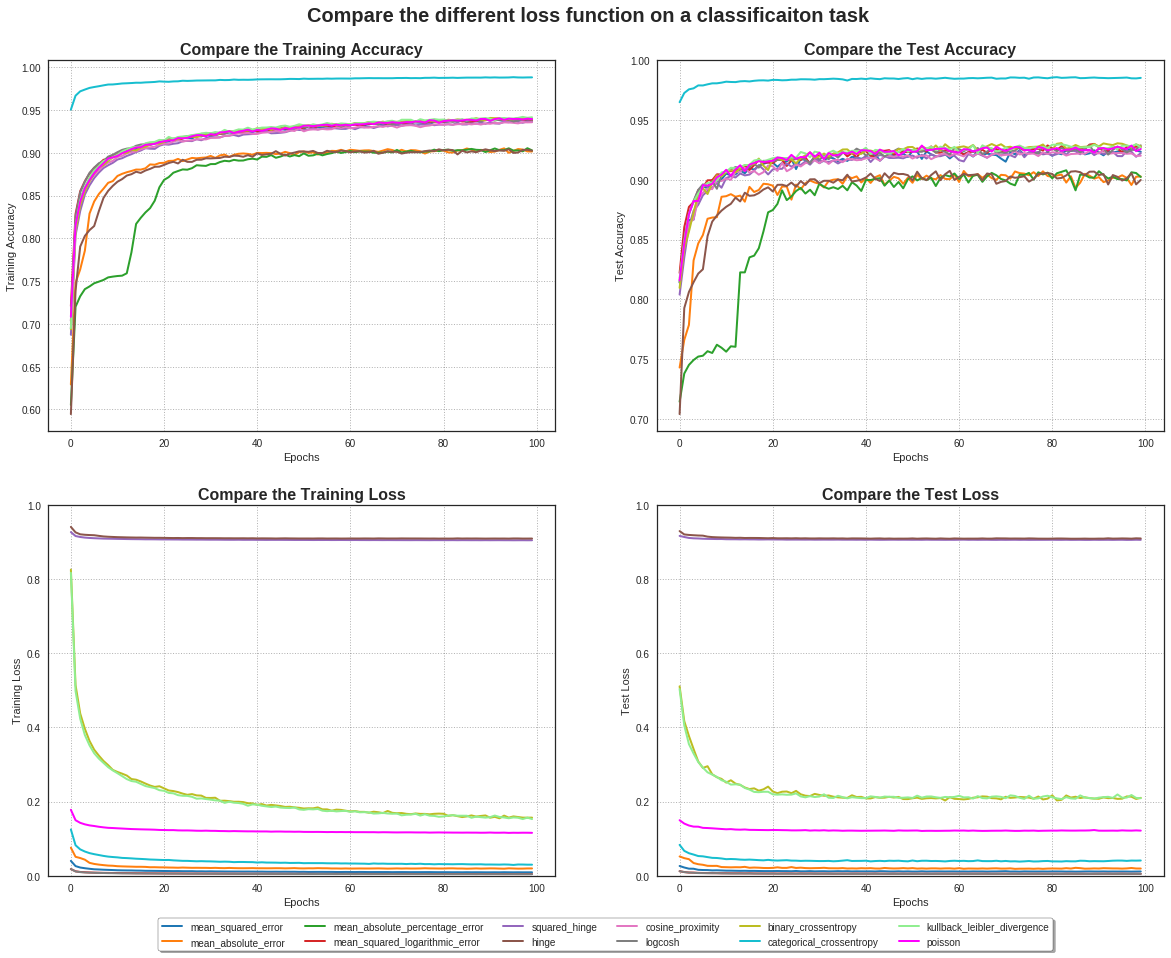

In [79]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,15))
ax1.plot(model_1_history.history['acc'],color=colors[0],label='mean_squared_error')
ax1.plot(model_2_history.history['acc'],color=colors[1],label='mean_absolute_error')
ax1.plot(model_3_history.history['acc'],color=colors[2],label='mean_absolute_percentage_error')
ax1.plot(model_4_history.history['acc'],color=colors[3],label='mean_squared_logarithmic_error')
ax1.plot(model_5_history.history['acc'],color=colors[4],label='squared_hinge')
ax1.plot(model_6_history.history['acc'],color=colors[5],label='hinge')
ax1.plot(model_7_history.history['acc'],color=colors[6],label='cosine_proximity')
ax1.plot(model_8_history.history['acc'],color=colors[7],label='logcosh')
ax1.plot(model_9_history.history['acc'],color=colors[8],label='binary_crossentropy')
ax1.plot(model_10_history.history['acc'],color=colors[9],label='categorical_crossentropy')
ax1.plot(model_11_history.history['acc'],color='lightgreen',label='kullback_leibler_divergence')
ax1.plot(model_12_history.history['acc'],color='fuchsia',label='poisson')
#ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Accuracy',fontsize=16, fontweight='bold')


ax2.plot(model_1_history.history['val_acc'],color=colors[0],label='mean_squared_error')
ax2.plot(model_2_history.history['val_acc'],color=colors[1],label='mean_absolute_error')
ax2.plot(model_3_history.history['val_acc'],color=colors[2],label='mean_absolute_percentage_error')
ax2.plot(model_4_history.history['val_acc'],color=colors[3],label='mean_squared_logarithmic_error')
ax2.plot(model_5_history.history['val_acc'],color=colors[4],label='squared_hinge')
ax2.plot(model_6_history.history['val_acc'],color=colors[5],label='hinge')
ax2.plot(model_7_history.history['val_acc'],color=colors[6],label='cosine_proximity')
ax2.plot(model_8_history.history['val_acc'],color=colors[7],label='logcosh')
ax2.plot(model_9_history.history['val_acc'],color=colors[8],label='binary_crossentropy')
ax2.plot(model_10_history.history['val_acc'],color=colors[9],label='categorical_crossentropy')
ax2.plot(model_11_history.history['val_acc'],color='lightgreen',label='kullback_leibler_divergence')
ax2.plot(model_12_history.history['val_acc'],color='fuchsia',label='poisson')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test Accuracy')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Test Accuracy',fontsize=16, fontweight='bold')


ax3.plot(model_1_history.history['loss'],color=colors[0],label='mean_squared_error')
ax3.plot(model_2_history.history['loss'],color=colors[1],label='mean_absolute_error')
ax3.plot(model_3_history.history['loss'],color=colors[2],label='mean_absolute_percentage_error')
ax3.plot(model_4_history.history['loss'],color=colors[3],label='mean_squared_logarithmic_error')
ax3.plot(model_5_history.history['loss'],color=colors[4],label='squared_hinge')
ax3.plot(model_6_history.history['loss'],color=colors[5],label='hinge')
ax3.plot(model_7_history.history['loss'],color=colors[6],label='cosine_proximity')
ax3.plot(model_8_history.history['loss'],color=colors[7],label='logcosh')
ax3.plot(model_9_history.history['loss'],color=colors[8],label='binary_crossentropy')
ax3.plot(model_10_history.history['loss'],color=colors[9],label='categorical_crossentropy')
ax3.plot(model_11_history.history['loss'],color='lightgreen',label='kullback_leibler_divergence')
ax3.plot(model_12_history.history['loss'],color='fuchsia',label='poisson')
#ax3.legend(frameon=True,edgecolor='black')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.set_ylim(0,1)
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss',fontsize=16, fontweight='bold')

ax4.plot(model_1_history.history['val_loss'],color=colors[0],label='mean_squared_error')
ax4.plot(model_2_history.history['val_loss'],color=colors[1],label='mean_absolute_error')
ax4.plot(model_3_history.history['val_loss'],color=colors[2],label='mean_absolute_percentage_error')
ax4.plot(model_4_history.history['val_loss'],color=colors[3],label='mean_squared_logarithmic_error')
ax4.plot(model_5_history.history['val_loss'],color=colors[4],label='squared_hinge')
ax4.plot(model_6_history.history['val_loss'],color=colors[5],label='hinge')
ax4.plot(model_7_history.history['val_loss'],color=colors[6],label='cosine_proximity')
ax4.plot(model_8_history.history['val_loss'],color=colors[7],label='logcosh')
ax4.plot(model_9_history.history['val_loss'],color=colors[8],label='binary_crossentropy')
ax4.plot(model_10_history.history['val_loss'],color=colors[9],label='categorical_crossentropy')
ax4.plot(model_11_history.history['val_loss'],color='lightgreen',label='kullback_leibler_divergence')
ax4.plot(model_12_history.history['val_loss'],color='fuchsia',label='poisson')
#ax4.legend(frameon=True,edgecolor='black')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.set_ylim(0,1)
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss',fontsize=16, fontweight='bold')

plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.1),
          ncol=6, fancybox=True, shadow=True, frameon=True,edgecolor='black')


fig.suptitle('Compare the different loss function on a classificaiton task',fontsize=20,fontweight='bold',y=0.93)
plt.show()